In [1]:
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import pandas as pd
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
from tensorflow.keras.layers.experimental.preprocessing import Normalization
from sklearn.model_selection import train_test_split  

In [2]:
DFver1=pd.read_excel("pp_df_y.xlsx")

In [3]:
DFver1=DFver1.drop(['Unnamed: 0'],1)

In [4]:
y_set=DFver1['y']

In [5]:
DFver1=DFver1.drop(['y'],1)

In [6]:
y_set = tf.keras.utils.to_categorical(y_set)

In [7]:
x_train, x_test, y_train, y_test=train_test_split(DFver1, y_set)

In [15]:
model=tf.keras.models.Sequential()
model = tf.keras.models.Sequential([layers.Input(shape=x_train.shape[1]), layers.Dense(16, activation='relu'
                                    ), layers.Dense(32, activation='relu'
                                   ),  layers.Dense(16, activation='relu'
                                    ),
                                    layers.Dense(10, activation='softmax') ])
model.compile(tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy',  metrics=['categorical_accuracy'])
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, restore_best_weights=True)


Epoch 1/200
173/173 [==============================] - 0s 3ms/step - loss: 2.0465 - categorical_accuracy: 0.2463 - val_loss: 1.6826 - val_categorical_accuracy: 0.3395
Epoch 2/200
173/173 [==============================] - 0s 1ms/step - loss: 1.3016 - categorical_accuracy: 0.4999 - val_loss: 1.0615 - val_categorical_accuracy: 0.5782
Epoch 3/200
173/173 [==============================] - 0s 2ms/step - loss: 0.9390 - categorical_accuracy: 0.6103 - val_loss: 0.8699 - val_categorical_accuracy: 0.6199
Epoch 4/200
173/173 [==============================] - 0s 2ms/step - loss: 0.7995 - categorical_accuracy: 0.6560 - val_loss: 0.7792 - val_categorical_accuracy: 0.6559
Epoch 5/200
173/173 [==============================] - 0s 1ms/step - loss: 0.7279 - categorical_accuracy: 0.6888 - val_loss: 0.7369 - val_categorical_accuracy: 0.6802
Epoch 6/200
173/173 [==============================] - 0s 1ms/step - loss: 0.6699 - categorical_accuracy: 0.7195 - val_loss: 0.6883 - val_categorical_accuracy: 0.695

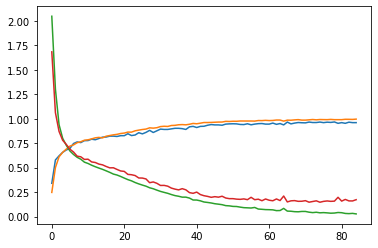

In [16]:
hists=model.fit(x_train, y_train, epochs=200, batch_size=20, validation_split=0.2, verbose=1,callbacks=[early_stopping])
plt.plot(hists.history['val_categorical_accuracy'])
plt.plot(hists.history['categorical_accuracy'])
plt.plot(hists.history['loss'])
plt.plot(hists.history['val_loss'])

In [22]:
model.evaluate(x_test, y_test, batch_size=20)


72/72 [==============================] - 0s 825us/step - loss: 0.2108 - categorical_accuracy: 0.9493


[0.21080908179283142, 0.9492703080177307]

In [13]:
y_pred=model.predict(x_test)

In [14]:
y_pred.shape

(1439, 10)

In [20]:
model.save('./project_model_r.h5')